In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [7]:
frcnn_results = pd.read_csv('faster_rcnn_train_results.csv')
yolo11_results = pd.read_csv('yolo11_train_results.csv')
rtdetrv2_results = pd.read_csv('rtdetrv2_train_results.csv')

In [30]:
max(frcnn_results["mAP95"])

0.6648886799812317

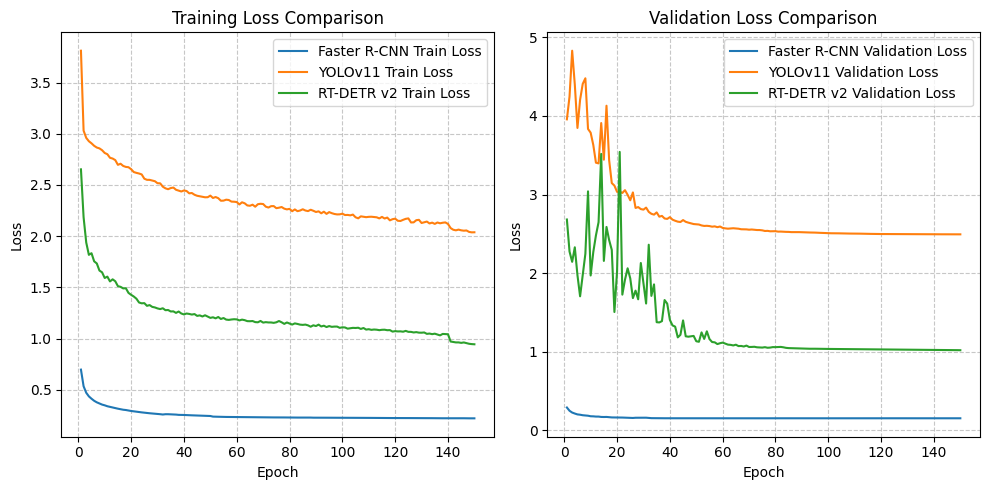

In [21]:
plt.figure(figsize=(10, 5))

# Plot for training losses
plt.subplot(1, 2, 1)
plt.plot(frcnn_results['epoch'], frcnn_results['train_loss'], label='Faster R-CNN Train Loss')
plt.plot(yolo11_results['epoch'], yolo11_results['train/box_loss'] + yolo11_results['train/cls_loss'] + yolo11_results['train/dfl_loss'], 
         label='YOLOv11 Train Loss')
plt.plot(rtdetrv2_results['epoch'], rtdetrv2_results['train/giou_loss'] + rtdetrv2_results['train/cls_loss'] + rtdetrv2_results['train/l1_loss'], 
         label='RT-DETR v2 Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for validation losses
plt.subplot(1, 2, 2)
plt.plot(frcnn_results['epoch'], frcnn_results['val_loss'], label='Faster R-CNN Validation Loss')
plt.plot(yolo11_results['epoch'], yolo11_results['val/box_loss'] + yolo11_results['val/cls_loss'] + yolo11_results['val/dfl_loss'], 
         label='YOLOv11 Validation Loss')
plt.plot(rtdetrv2_results['epoch'], rtdetrv2_results['val/giou_loss'] + rtdetrv2_results['val/cls_loss'] + rtdetrv2_results['val/l1_loss'], 
         label='RT-DETR v2 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

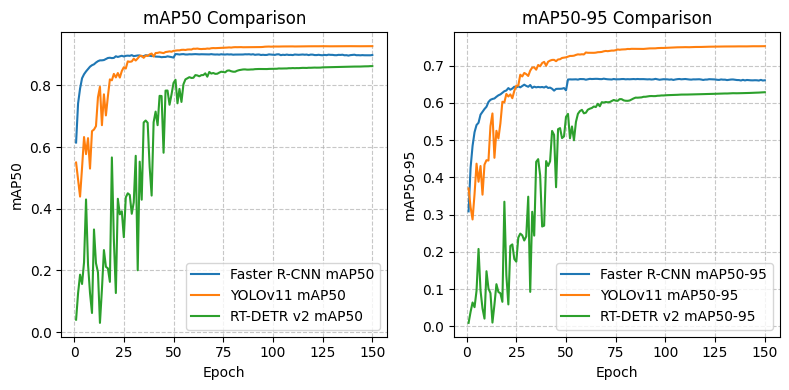

In [26]:
plt.figure(figsize=(8, 4))

# Plot for mAP50
plt.subplot(1, 2, 1)
plt.plot(frcnn_results['epoch'], frcnn_results['mAP50'], label='Faster R-CNN mAP50')
plt.plot(yolo11_results['epoch'], yolo11_results['metrics/mAP50(B)'], label='YOLOv11 mAP50')
plt.plot(rtdetrv2_results['epoch'], rtdetrv2_results['metrics/mAP50(B)'], label='RT-DETR v2 mAP50')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.title('mAP50 Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for mAP50-95
plt.subplot(1, 2, 2)
plt.plot(frcnn_results['epoch'], frcnn_results['mAP95'], label='Faster R-CNN mAP50-95')
plt.plot(yolo11_results['epoch'], yolo11_results['metrics/mAP50-95(B)'], label='YOLOv11 mAP50-95')
plt.plot(rtdetrv2_results['epoch'], rtdetrv2_results['metrics/mAP50-95(B)'], label='RT-DETR v2 mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

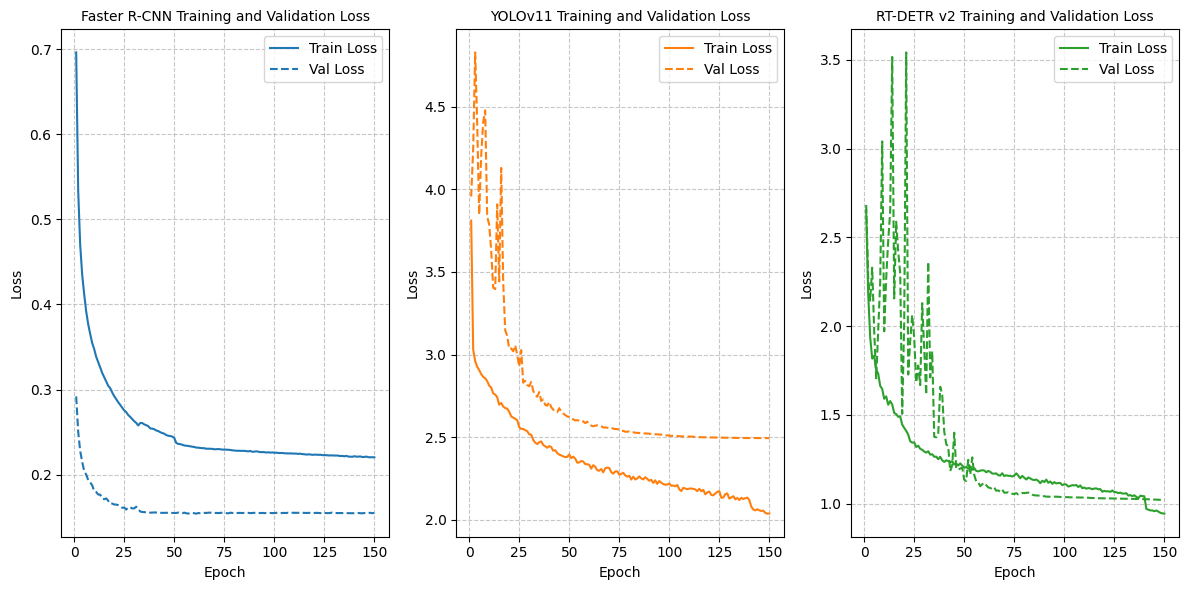

In [32]:
plt.figure(figsize=(12, 6))

# Set up a colorful style for better visualization
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
model_names = ['Faster R-CNN', 'YOLOv11', 'RT-DETR v2']

# 1. Faster R-CNN losses
plt.subplot(1, 3, 1)
plt.plot(frcnn_results['epoch'], frcnn_results['train_loss'], color=colors[0], label='Train Loss')
plt.plot(frcnn_results['epoch'], frcnn_results['val_loss'], color=colors[0], linestyle='--', label='Val Loss')
plt.title(f'{model_names[0]} Training and Validation Loss', fontsize=10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 2. YOLOv11 losses
plt.subplot(1, 3, 2)
train_loss_yolo = yolo11_results['train/box_loss'] + yolo11_results['train/cls_loss'] + yolo11_results['train/dfl_loss']
val_loss_yolo = yolo11_results['val/box_loss'] + yolo11_results['val/cls_loss'] + yolo11_results['val/dfl_loss']
plt.plot(yolo11_results['epoch'], train_loss_yolo, color=colors[1], label='Train Loss')
plt.plot(yolo11_results['epoch'], val_loss_yolo, color=colors[1], linestyle='--', label='Val Loss')
plt.title(f'{model_names[1]} Training and Validation Loss', fontsize=10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 3. RT-DETR v2 losses
plt.subplot(1, 3, 3)
train_loss_rtdetr = rtdetrv2_results['train/giou_loss'] + rtdetrv2_results['train/cls_loss'] + rtdetrv2_results['train/l1_loss']
val_loss_rtdetr = rtdetrv2_results['val/giou_loss'] + rtdetrv2_results['val/cls_loss'] + rtdetrv2_results['val/l1_loss']
plt.plot(rtdetrv2_results['epoch'], train_loss_rtdetr, color=colors[2], label='Train Loss')
plt.plot(rtdetrv2_results['epoch'], val_loss_rtdetr, color=colors[2], linestyle='--', label='Val Loss')
plt.title(f'{model_names[2]} Training and Validation Loss', fontsize=10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()